In [ ]:
# import keras
# import itertools
# from time import time
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.io.arff import loadarff
# from sklearn.preprocessing import StandardScaler, RobustScaler
# import tensorflow as tf
# import seaborn as sns
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.optimizers import Adam
# from scipy.io import arff

# import xgboost as xgb
# from lightgbm import LGBMClassifier
# # from catboost import CatBoostClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
# from keras.models import load_model, Sequential
# from keras.activations import swish
# from keras.layers import LeakyReLU, Activation, Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization
# from keras.layers import BatchNormalization, ReLU, GlobalAveragePooling1D, Dropout, GlobalMaxPooling1D
# from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['axes.unicode_minus'] = False  # minus 표시

In [1]:
import itertools
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from sklearn.preprocessing import StandardScaler, RobustScaler
import tensorflow as tf
import seaborn as sns

import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model




In [2]:
file_path = './FordA/'
train_fn = 'FordA_TRAIN.arff'
test_fn = 'FordA_TEST.arff'

def read_ariff(path):
    raw_data, meta = loadarff(path)
    cols = [x for x in meta]
    data2d = np.zeros([raw_data.shape[0], len(cols)])
    
    for i, col in zip(range(len(cols)), cols):
        data2d[:, i] = raw_data[col]
    return data2d

train = read_ariff(file_path + train_fn)
test = read_ariff(file_path + test_fn)

In [3]:
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)

In [4]:
# column 명을 str으로 바꾸고 s 붙이기
train_df.columns = train_df.columns.astype(str)
train_df.columns = 's' + train_df.columns
test_df.columns = test_df.columns.astype(str)
test_df.columns = 's' + test_df.columns

In [5]:
# 라벨 열 이름 바꾸기 (s500 -> state)
train_df.rename(columns={train_df.columns[-1]:'state'}, inplace=True)
test_df.rename(columns={test_df.columns[-1]:'state'}, inplace=True)
train_df

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s491,s492,s493,s494,s495,s496,s497,s498,s499,state
0,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,1.640809,...,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343,-1.0
1,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,-1.619951,...,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086,1.0
2,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,-2.550600,...,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391,-1.0
3,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,-1.506933,...,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736,-1.0
4,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,1.466467,...,0.725496,0.697453,0.731967,0.808545,0.839823,0.733046,0.437520,-0.026585,-0.602213,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3596,0.196022,-0.070102,-0.336226,-0.516799,-0.555282,-0.442793,-0.221369,0.025217,0.233320,0.350545,...,1.129082,0.528158,-0.039020,-0.573043,-1.061479,-1.514392,-1.934743,-2.316612,-2.603753,-1.0
3597,0.041994,0.422255,0.740529,0.975426,1.109891,1.137270,1.058349,0.894955,0.671224,0.421544,...,-0.392667,-0.333749,-0.316543,-0.340299,-0.392876,-0.450805,-0.482609,-0.467769,-0.393755,1.0
3598,-0.570054,-0.333165,-0.293519,-0.425344,-0.590869,-0.615648,-0.348033,0.275412,1.153586,2.035725,...,0.579700,0.157463,-0.353980,-0.885246,-1.314421,-1.512655,-1.393714,-0.942733,-0.270722,-1.0
3599,2.006732,2.079150,2.022036,1.867560,1.648112,1.379446,1.093717,0.784057,0.434150,0.029284,...,1.148971,0.928088,0.634953,0.311682,-0.007376,-0.270543,-0.432145,-0.441231,-0.280709,1.0


In [6]:
# state값의 -1을 0으로 바꾸기, state값을 int형으로
train_df.loc[train_df.state == -1, 'state'] = 0
test_df.loc[test_df.state == -1, 'state'] = 0
train_df.state = train_df.state.astype(int)
test_df.state = test_df.state.astype(int)
train_df

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s491,s492,s493,s494,s495,s496,s497,s498,s499,state
0,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,1.640809,...,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343,0
1,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,-1.619951,...,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086,1
2,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,-2.550600,...,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391,0
3,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,-1.506933,...,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736,0
4,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,1.466467,...,0.725496,0.697453,0.731967,0.808545,0.839823,0.733046,0.437520,-0.026585,-0.602213,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3596,0.196022,-0.070102,-0.336226,-0.516799,-0.555282,-0.442793,-0.221369,0.025217,0.233320,0.350545,...,1.129082,0.528158,-0.039020,-0.573043,-1.061479,-1.514392,-1.934743,-2.316612,-2.603753,0
3597,0.041994,0.422255,0.740529,0.975426,1.109891,1.137270,1.058349,0.894955,0.671224,0.421544,...,-0.392667,-0.333749,-0.316543,-0.340299,-0.392876,-0.450805,-0.482609,-0.467769,-0.393755,1
3598,-0.570054,-0.333165,-0.293519,-0.425344,-0.590869,-0.615648,-0.348033,0.275412,1.153586,2.035725,...,0.579700,0.157463,-0.353980,-0.885246,-1.314421,-1.512655,-1.393714,-0.942733,-0.270722,0
3599,2.006732,2.079150,2.022036,1.867560,1.648112,1.379446,1.093717,0.784057,0.434150,0.029284,...,1.148971,0.928088,0.634953,0.311682,-0.007376,-0.270543,-0.432145,-0.441231,-0.280709,1


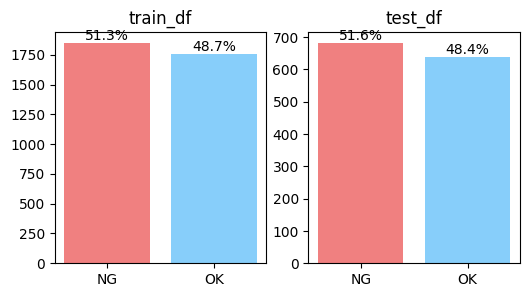

In [7]:
# train, test 데이터셋의 라벨 유니크값, 각 카운팅
train_label_unique = train_df.iloc[:, -1].unique()
train_label_count = train_df.iloc[:, -1].value_counts()

test_label_unique = test_df.iloc[:, -1].unique()
test_label_count = test_df.iloc[:, -1].value_counts()

# 라벨별 카운팅 값 할당
train_sum = train_label_count.sum()
train_ng_count = train_label_count[0]
train_ok_count = train_label_count[1]

test_sum = test_label_count.sum()
test_ng_count = test_label_count[0]
test_ok_count = test_label_count[1]

# NG, OK 비율 그래프
fig, axs = plt.subplots(1,2, figsize=(6, 3))
colors = ['lightcoral', 'lightskyblue']

axs[0].set_title('train_df')
axs[0].bar(train_label_unique, train_label_count, color=colors)
axs[0].set_xticks([train_label_unique[0], train_label_unique[1]])
axs[0].set_xticklabels(['NG', 'OK'])
axs[0].text(train_label_unique[0], train_ng_count, f'{round(train_ng_count/train_sum*100,1)}%', ha='center', va='bottom')
axs[0].text(train_label_unique[1], train_ok_count, f'{round(train_ok_count/train_sum*100,1)}%', ha='center', va='bottom')

axs[1].set_title('test_df')
axs[1].bar(test_label_unique, test_label_count, color=colors)
axs[1].set_xticks([test_label_unique[0], test_label_unique[1]])
axs[1].set_xticklabels(['NG', 'OK'])
axs[1].text(test_label_unique[0], test_ng_count, f'{round(test_ng_count/test_sum*100,1)}%', ha='center', va='bottom')
axs[1].text(test_label_unique[1], test_ok_count, f'{round(test_ok_count/test_sum*100,1)}%', ha='center', va='bottom')
plt.show()

In [8]:
# 센서별 시간대 min, max 차이값 --> 확인 목적 : 스케일링이 필요할까?

train_min_max = pd.DataFrame()
sensor_diff = []
for i in train_df.columns:
    diff = train_df[i].max() - train_df[i].min()
    sensor_diff.append(diff)

train_min_max['diff'] = sensor_diff
train_min_max['state'] = train_df.iloc[:, -1]
train_min_max.describe()

,diff,state
count,501.000000,501.000000
mean,6.915233,0.487026
std,0.544276,0.500331
min,1.000000,0.000000
25%,6.586411,0.000000
50%,6.842379,0.000000
75%,7.208924,1.000000
max,8.703571,1.000000


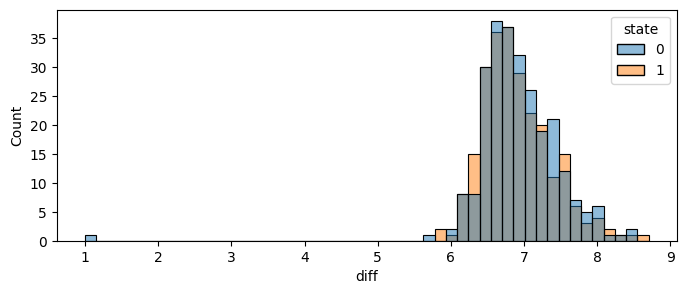

In [9]:
# 센서별 시간대 편차 분포 -> 분포가 크지 않아 스케일링 필요 없음
# 센서별 분포는 결과와 상관없음 (세로축이기 때문)
plt.figure(figsize=(8,3))
sns.histplot(data=train_min_max, x='diff', hue='state')
plt.show()

In [10]:
# 시간대별 센서들의 편차 구해서 새로운 df 만들기 -> 결과와 관련이 있는지 확인, 스케일링 필요한지 확인

train_time_diff = pd.DataFrame()
time_diff = []
for i in range(train_df.shape[0]):
    diff = train_df.iloc[i, :].max() - train_df.iloc[i, :].min()
    time_diff.append(diff)

train_time_diff['time_diff'] = time_diff
train_time_diff['state'] = train_df.state
train_time_diff

,time_diff,state
0,4.462870,0
1,4.804664,1
2,5.065760,0
3,5.741580,0
4,7.010648,0
...,...,...
3596,6.808501,0
3597,6.184156,1
3598,5.649655,0
3599,4.930801,1


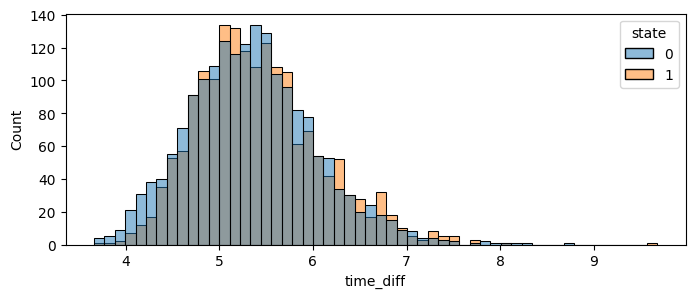

In [11]:
# 시간대별 센서들의 편차 
plt.figure(figsize=(8,3))
sns.histplot(data=train_time_diff, x='time_diff', hue='state')
plt.show()

In [12]:
# 시간대별 편차 상위10, 하위10 -> 결과와 연관 있는지 비교
# --> 차이 없음
print(train_time_diff.sort_values(by='time_diff', ascending=False).head(10))
print(train_time_diff.sort_values(by='time_diff', ascending=False).tail(10))

# state별 편차의 평균 확인 -> 결과와 연관 있는지 비교
# --> 차이 없음
print(train_time_diff.groupby('state').time_diff.mean())

      time_diff  state
524    9.676921      1
1487   8.722089      0
657    8.321330      0
581    8.149138      0
187    8.052635      1
2750   8.049539      0
2577   7.894768      0
1589   7.887753      0
3099   7.818200      0
1801   7.776911      1
      time_diff  state
2048   3.879967      0
218    3.857987      0
26     3.813121      0
265    3.805530      1
2687   3.775540      0
1410   3.740404      0
3348   3.738751      0
390    3.736143      1
1134   3.711637      0
445    3.661719      0
state
0    5.350482
1    5.419309
Name: time_diff, dtype: float64


0      -0.797172
1       0.804855
2       0.727985
3      -0.234439
4      -0.171328
          ...   
3596    0.196022
3597    0.041994
3598   -0.570054
3599    2.006732
3600   -0.125241
Name: s0, Length: 3601, dtype: float64

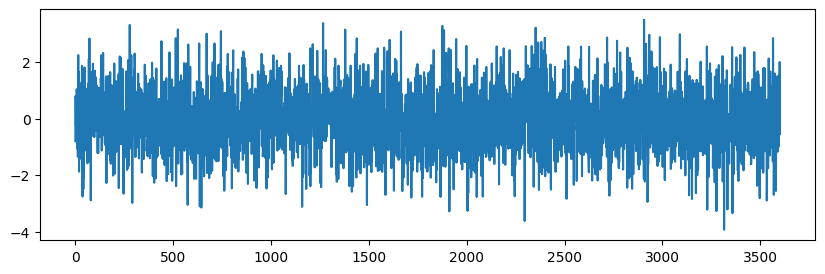

In [13]:
# 특정 센서의 타임별 plot 그려보기
plt.figure(figsize=(10,3))
train_df.s0.plot()
train_df.s0

,state,sensor,value
0,0,s0,-0.014895
1,1,s0,-0.018616
2,0,s1,-0.015515
3,1,s1,-0.015013
4,0,s2,-0.016355
...,...,...,...
995,1,s497,0.002857
996,0,s498,0.002245
997,1,s498,-0.002297
998,0,s499,0.010434


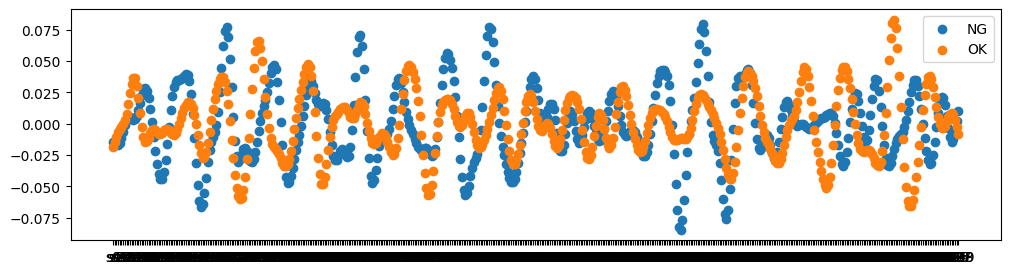

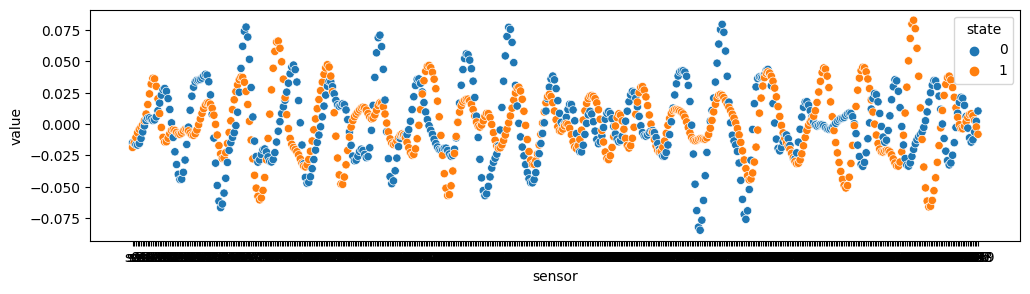

In [14]:
# state 그룹별 센서 평균값
df_sen_mean = train_df.groupby(by='state').mean().reset_index()

#plt.scatter
plt.figure(figsize=(12,3))
plt.scatter(df_sen_mean.columns[1:], df_sen_mean.iloc[0, 1:], label = 'NG')
plt.scatter(df_sen_mean.columns[1:], df_sen_mean.iloc[1, 1:], label = 'OK')
plt.legend()

#sns.scatterplot
plt.figure(figsize=(12,3))
df_sen_mean_melt = df_sen_mean.melt(id_vars='state', var_name='sensor', value_name='value')
sns.scatterplot(data=df_sen_mean_melt, x='sensor', y='value', hue='state')

df_sen_mean_melt

In [15]:
# state0과 1의 센서별 평균값 구하기 -> 차이 값 구하기 -> 0과1의 변별력이 있는 센서가 몇번인지 확인
df_sen_mean_diff = df_sen_mean.T.drop(index='state')
df_sen_mean_diff.columns = 'state_' + df_sen_mean_diff.columns.astype(str) + '_mean'
df_sen_mean_diff['diff'] = abs(df_sen_mean_diff.iloc[:, 0] - df_sen_mean_diff.iloc[:, 1])
diff_top_20 = df_sen_mean_diff.sort_values(by='diff', ascending=False).head(20).index.tolist()
df_sen_mean_diff.sort_values(by='diff', ascending=False).head(20)
df_sen_mean_diff.sort_values(by='diff', ascending=False).tail()

,state_0_mean,state_1_mean,diff
s290,-0.004439,-0.004069,0.000369
s340,-0.007973,-0.008240,0.000267
s192,0.001617,0.001389,0.000228
s389,-0.023179,-0.023300,0.000121
s160,-0.008531,-0.008579,0.000048


count    1846.000000
mean       -0.025821
std         1.017110
min        -3.171938
25%        -0.701194
50%        -0.032110
75%         0.659528
max         3.262892
Name: s460, dtype: float64
count    1755.000000
mean        0.079882
std         1.021208
min        -3.025450
25%        -0.587931
50%         0.064502
75%         0.765216
max         3.130989
Name: s460, dtype: float64


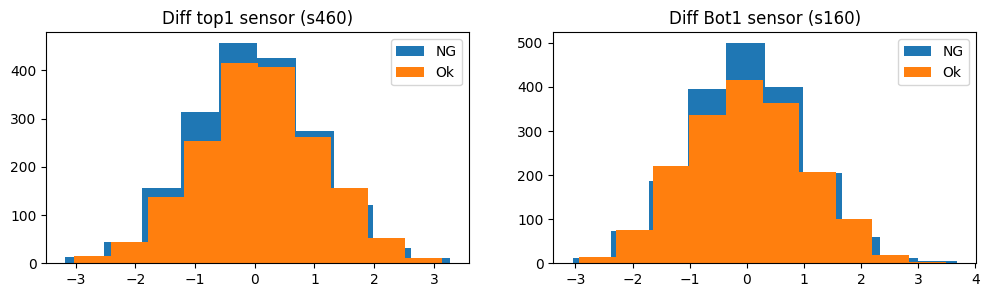

In [16]:
# 가장 편차가 큰 s460 센서에 대해 state 0과 1의 분포확인 (hist)
# --> 가장 큰 편차도 0.1 밖에 안돼서 의미 없다. --> 특정한 단일 센서값으로는 0과 1을 구분할 수 없다.
print(train_df.loc[train_df.state == 0, 's460'].describe())
print(train_df.loc[train_df.state == 1, 's460'].describe())

fig, axs = plt.subplots(1,2, figsize=(12, 3))

# 편차 Top1 센서 (s460)
axs[0].set_title('Diff top1 sensor (s460)')
axs[0].hist(train_df.loc[train_df.state == 0, 's460'], label='NG')
axs[0].hist(train_df.loc[train_df.state == 1, 's460'], label='Ok')
axs[0].legend()

# 편차 Bot1 센서 (s160)
axs[1].set_title('Diff Bot1 sensor (s160)')
axs[1].hist(train_df.loc[train_df.state == 0, 's160'], label='NG')
axs[1].hist(train_df.loc[train_df.state == 1, 's160'], label='Ok')
axs[1].legend()

<Axes: xlabel='s160', ylabel='Count'>

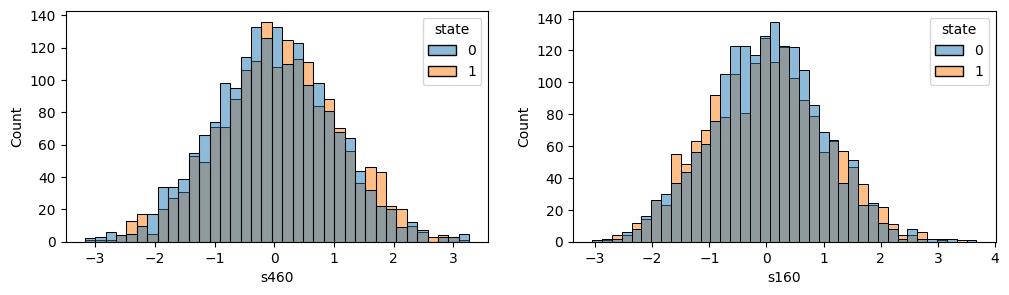

In [17]:
# 같은 작업을 sns.histplot으로 시각화

fig, axs = plt.subplots(1,2, figsize=(12, 3))
sns.histplot(data=train_df, x=train_df.s460, hue=train_df.state, ax=axs[0])
sns.histplot(data=train_df, x=train_df.s160, hue=train_df.state, ax=axs[1])

<Axes: >

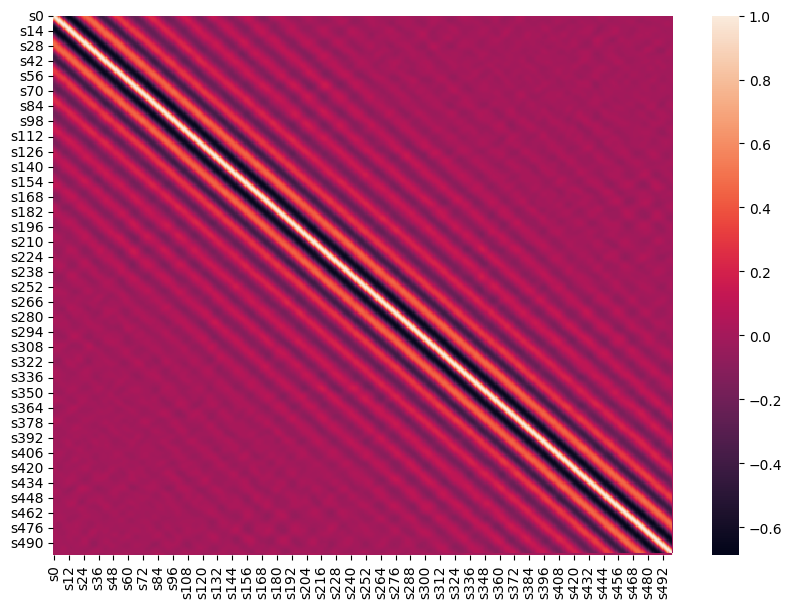

In [18]:
train_corr = train_df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(train_corr)

In [19]:
# state 상관계수 상위10, 하위10

corr_top10 = train_corr.state.sort_values(ascending=False).head(11).drop('state', axis=0)
corr_bot10 = train_corr.state.sort_values(ascending=True).head(10)
corr_top10.sort_index(inplace=True)
corr_bot10.sort_index(inplace=True)

corr_top10
corr_bot10

s221   -0.037518
s222   -0.038838
s223   -0.035254
s451   -0.034039
s469   -0.035682
s470   -0.042066
s471   -0.045462
s472   -0.045961
s473   -0.043726
s474   -0.038330
Name: state, dtype: float64

<BarContainer object of 10 artists>

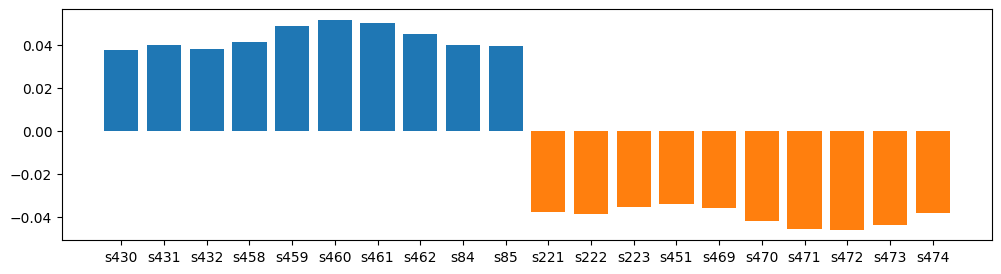

In [20]:
# state 상관계수 상위10, 하위10
plt.figure(figsize=(12, 3))
plt.bar(corr_top10.index, corr_top10.values)
plt.bar(corr_bot10.index, corr_bot10.values)

<BarContainer object of 20 artists>

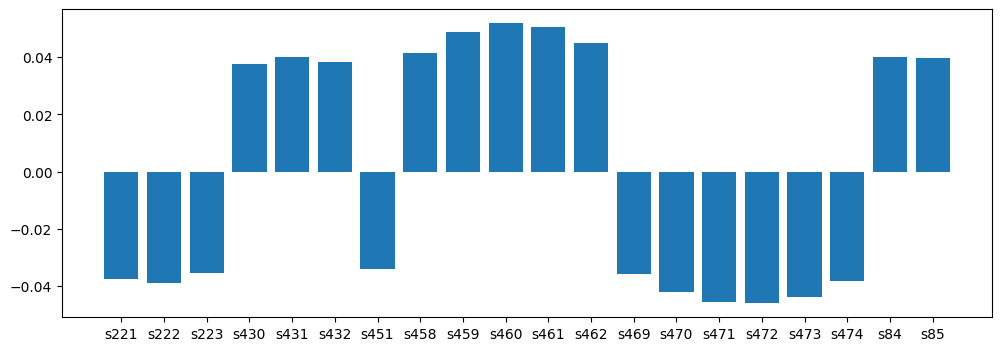

In [21]:
# state 상관계수 상위10, 하위10을 센서 번호로 정렬

corr_concat = pd.concat([corr_top10, corr_bot10]).sort_index()

plt.figure(figsize=(12,4))
plt.bar(corr_concat.index, corr_concat.values)

<BarContainer object of 26 artists>

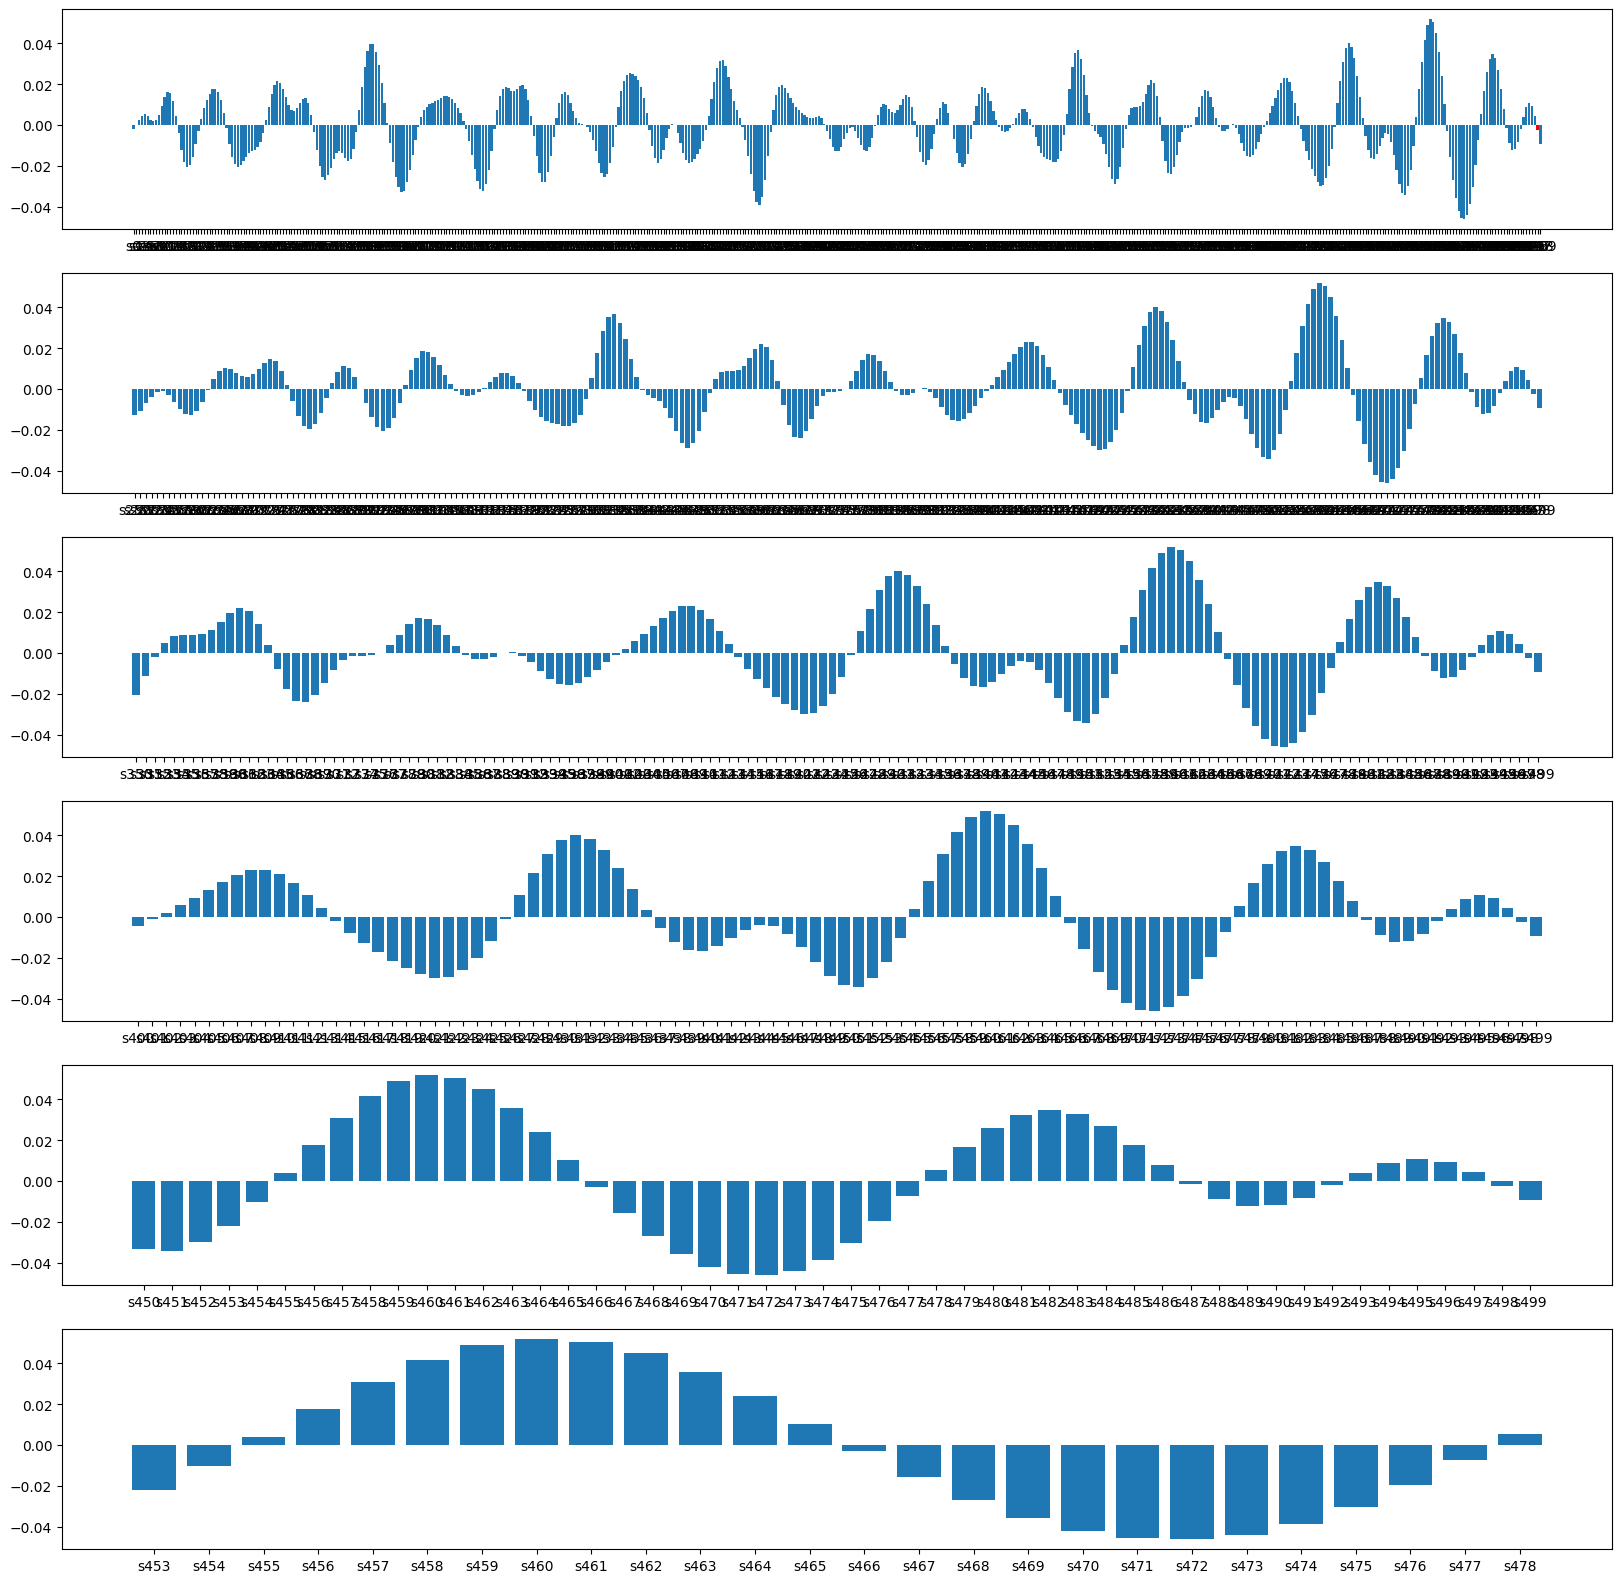

In [22]:
# 전체 센서에 대한 state 상관계수
corr_state = train_corr.state.drop('state', axis=0)
corr_state

fig, axs = plt.subplots(6,1, figsize=(20, 20))
axs[0].bar(corr_state.index, corr_state.values)
axs[0].bar(corr_state.index[498], corr_state.values[498], color='red') # 특정 센서값 전체에서 보기
axs[1].bar(corr_state.index[250:], corr_state.values[250:])
axs[2].bar(corr_state.index[350:], corr_state.values[350:])
axs[3].bar(corr_state.index[400:], corr_state.values[400:])
axs[4].bar(corr_state.index[450:], corr_state.values[450:])
axs[5].bar(corr_state.index[453:479], corr_state.values[453:479])

<BarContainer object of 500 artists>

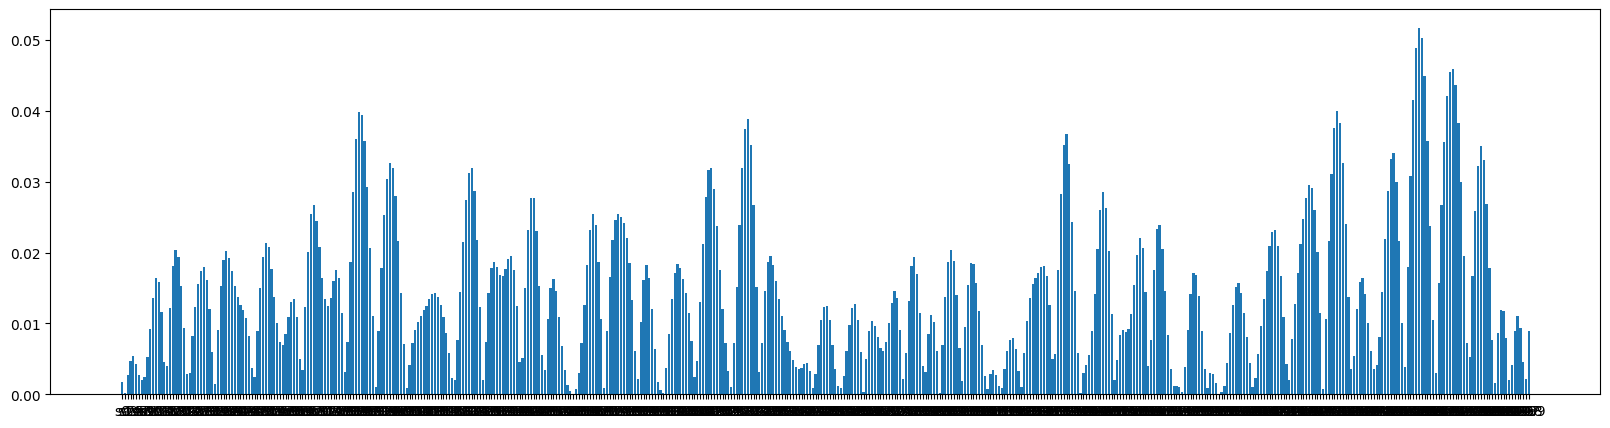

In [23]:
# 전체 센서값을 abs 한뒤 state 상관계수
corr_state_abs = abs(train_corr.state.drop('state', axis=0))

plt.figure(figsize=(20, 5))
plt.bar(corr_state_abs.index, corr_state_abs.values)

In [24]:
# 상관계수 가장 높은 센서 top5 -> 460번 센서가 top1, 이미 검토는 위에서 했음. 유의차 없음.
corr_state_abs.sort_values(ascending=False).head()

s460    0.051789
s461    0.050375
s459    0.048899
s472    0.045961
s471    0.045462
Name: state, dtype: float64

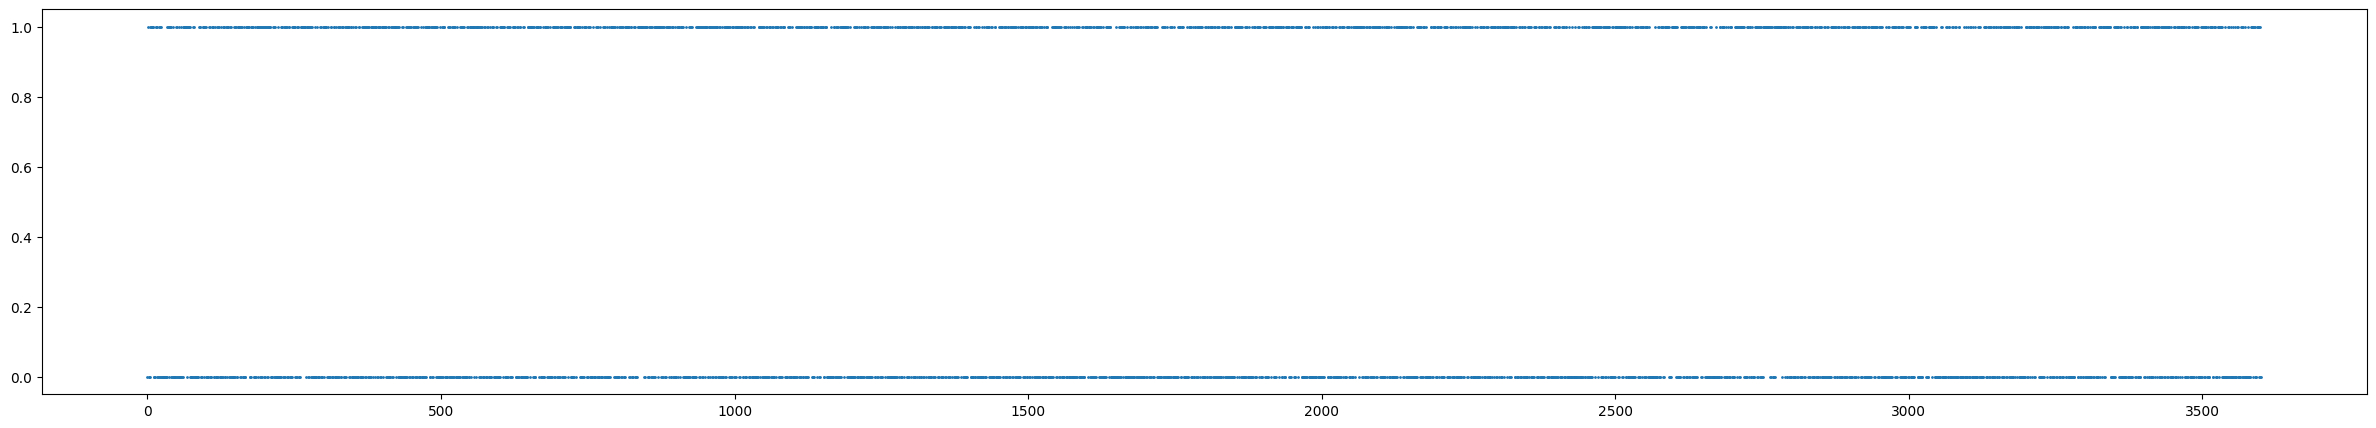

In [25]:
# state를 시간의 흐름대로 보기 --> 규칙성 없다.
plt.figure(figsize=(30,5))
plt.scatter(train_df.state.index, train_df.state.values, s=1)

In [26]:
# train, test 데이터셋 라벨 분리 (x, y)
x_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]
x_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3601, 500)
(3601,)
(1320, 500)
(1320,)


In [27]:
# 정규화 (정규화 안했을 때 정확도 더 높아서 취소)

# -----------------------------------------------------------------------
# # 정규화 안했을 떄
# <class 'xgboost.sklearn.XGBClassifier'>_acc : 77.05%
# <class 'lightgbm.sklearn.LGBMClassifier'>_acc : 78.56%
# <class 'catboost.core.CatBoostClassifier'>_acc : 84.55%
# <class 'sklearn.ensemble._forest.RandomForestClassifier'>_acc : 73.33%
# # 정규화 했을 떄
# <class 'xgboost.sklearn.XGBClassifier'>_acc : 76.89%
# <class 'lightgbm.sklearn.LGBMClassifier'>_acc : 77.8%
# <class 'catboost.core.CatBoostClassifier'>_acc : 83.86%
# <class 'sklearn.ensemble._forest.RandomForestClassifier'>_acc : 73.79%
# -----------------------------------------------------------------------

# from sklearn.preprocessing import StandardScaler
# stder = StandardScaler()
# stder.fit(x_train)
# x_train_t = stder.transform(x_train)

In [28]:
# Logistic Regression Model (Using Scikit-learn Library)

from sklearn.linear_model import LogisticRegression
clf_lr_1 = LogisticRegression(max_iter=1000)
# clf_lr_1 = LogisticRegression(penalty='l2', tol=0.0001, C=1, fit_intercept=True, intercept_scaling=1, random_state=2, solver='lbfgs', max_iter=1000, multi_class='auto', verbose=0)

clf_lr_1.fit(x_train, y_train)
# Logistic Regression Model 평가
# -> 하이퍼파라미터 없을때가 정확도가 더 높음 (0.4833 -> 0.4886 -> 정규화 안하면 0.4939)

y_pred = clf_lr_1.predict(x_test)
score = clf_lr_1.score(x_test, y_test)
print(score)

0.4954545454545455


In [29]:
# # Auto ML로 정확도 높은 ML 모델 확인하기
# from autogluon.tabular import TabularPredictor

# # 데이터 준비
# train_data = train_df  # 학습 데이터
# test_data = test_df   # 테스트 데이터
# label_column = 'state'  # 레이블 열의 이름

# # AutoGluon 모델 학습
# predictor = TabularPredictor(label=label_column).fit(train_data)

# # 테스트 데이터에 대한 예측
# y_pred = predictor.predict(test_data)

# # 정확도 계산
# accuracy = (test_data[label_column] == y_pred).mean()
# print(f"Accuracy: {accuracy}")

In [30]:
# Autogluon에서 best 모델로 학습시키기 (predictor에 best 모델이 저장되어 있음)

# y_pred = predictor.predict(test_df)
# accuracy = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

# ld_board = predictor.leaderboard(train_df, silent=True)
# ld_board

XGBClassifier_acc : 77.05%
LGBMClassifier_acc : 78.56%
CatBoostClassifier_acc : 84.55%
RandomForestClassifier_acc : 72.27%


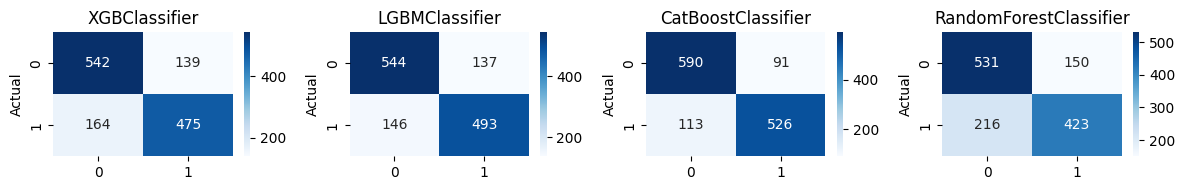

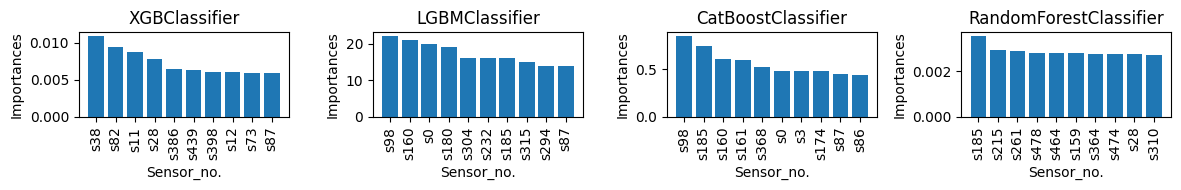

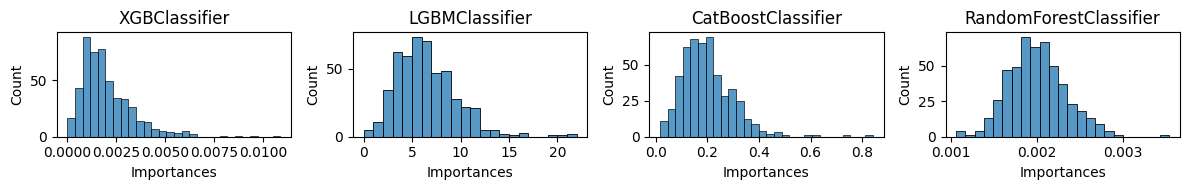

In [31]:
# 모델 리스트 (추가 시킬 모델은 모델 리스트에 한줄 추가만 하면 됨)
from catboost import CatBoostClassifier

model = [xgb.XGBClassifier(eval_metric='logloss'),
         LGBMClassifier(),
         CatBoostClassifier(verbose=0),
         RandomForestClassifier()]

# 모델명 리스트
model_list = []
for i in range(len(model)):
    model_list.append(type(model[i]).__name__)

# 캔버스 3개 만들기 (혼동행렬 / Feat.Imp. 상위 10항목 / Feat.Imp. 전체 분포)
fig, axs = plt.subplots(1, len(model), figsize=(3*len(model), 2))
fig2, axs2 = plt.subplots(1, len(model), figsize=(3*len(model), 2))
fig3, axs3 = plt.subplots(1, len(model), figsize=(3*len(model), 2))

# 전체 모델 학습 후 정확도, 혼동행렬, Feat.Import. 출력하기
for i in range(len(model)):
    model[i].fit(x_train, y_train)
    y_pred = model[i].predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_list[i]}_acc : {round(accuracy*100,2)}%')
    
    # 혼동 행렬을 히트맵으로 그리기
    conf_mat = confusion_matrix(y_test, y_pred) # 혼동 행렬 만들기
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', ax=axs[i])
    axs[i].set_title(model_list[i])
    axs[i].set_ylabel('Actual')

    # Feature importances 상위10 항목 구하기
    imp_df = pd.DataFrame(model[i].feature_importances_)
    imp_df.rename(columns={0:'imp'}, inplace=True)
    imp_df.index = 's' + imp_df.index.astype(str)
    imp_df.sort_values(by='imp', ascending=False, inplace=True)

    axs2[i].bar(imp_df.head(10).index, imp_df.head(10).iloc[:, 0])
    axs2[i].set_title(model_list[i])
    axs2[i].tick_params(axis='x', rotation=90)
    axs2[i].set_xlabel('Sensor_no.')
    axs2[i].set_ylabel('Importances')
    
    # Feature importances 전체 분포도
    sns.histplot(data=imp_df, x=imp_df.imp, ax=axs3[i])
    axs3[i].set_title(model_list[i])
    axs3[i].set_xlabel('Importances')
    
fig.tight_layout()
fig2.tight_layout()
fig3.tight_layout()
plt.show()

<Axes: ylabel='s15'>

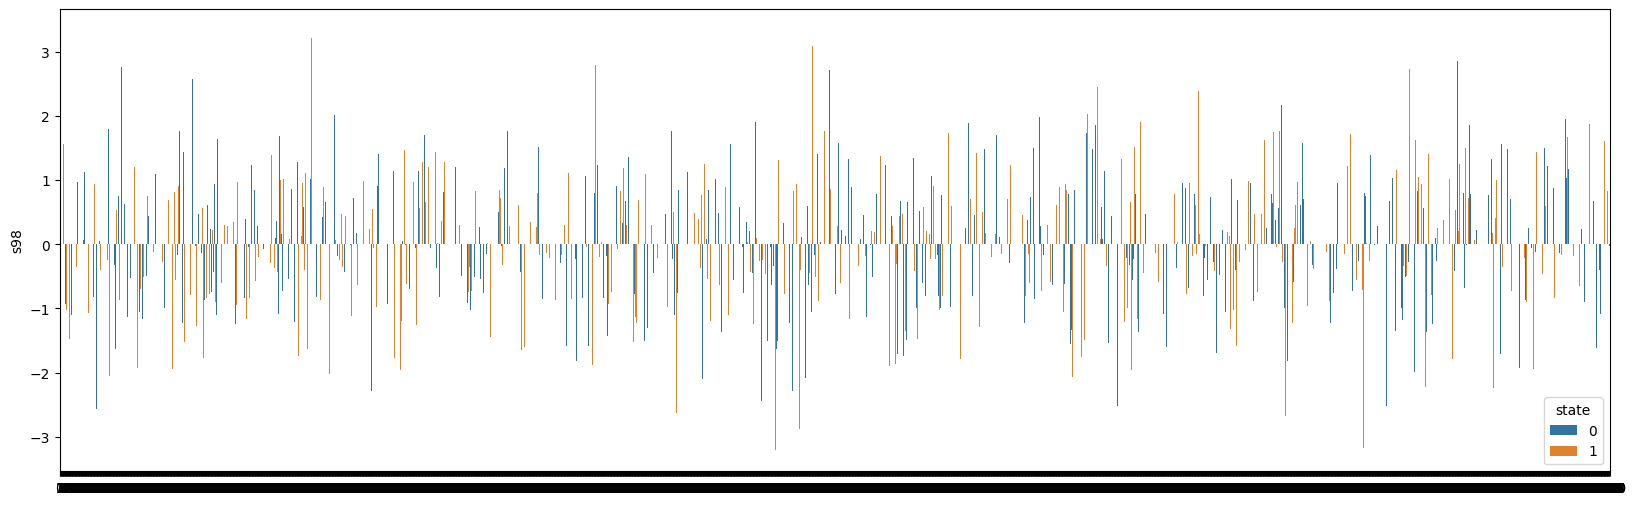

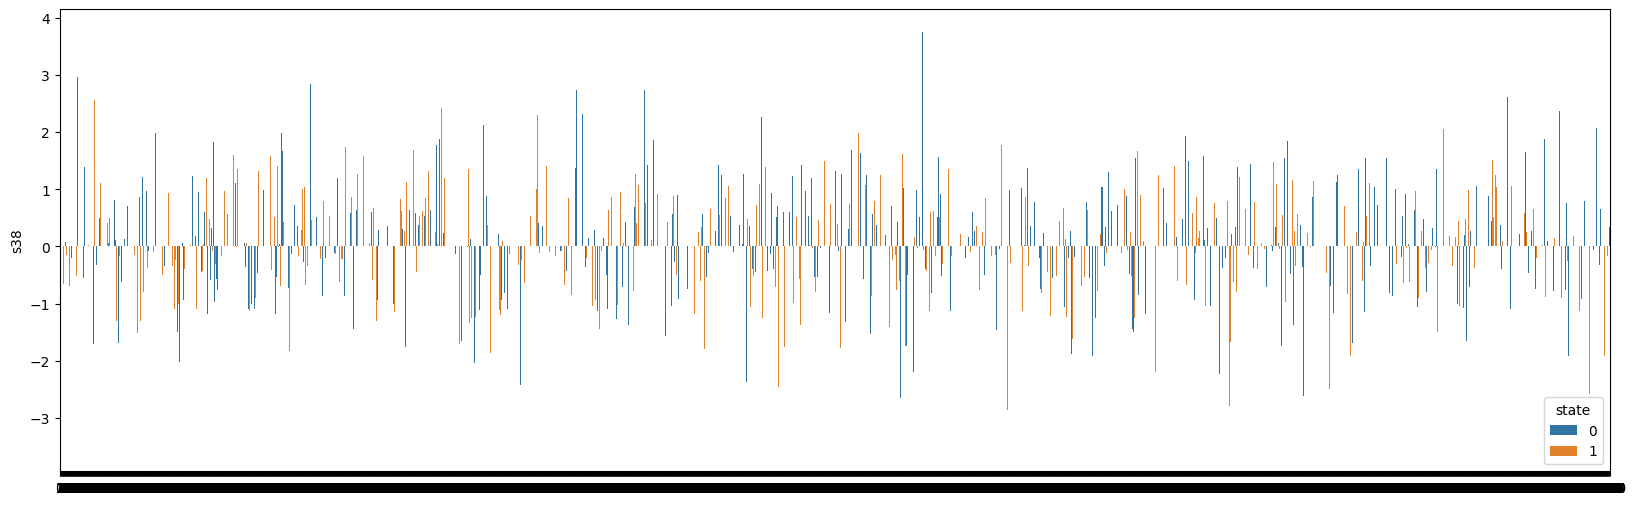

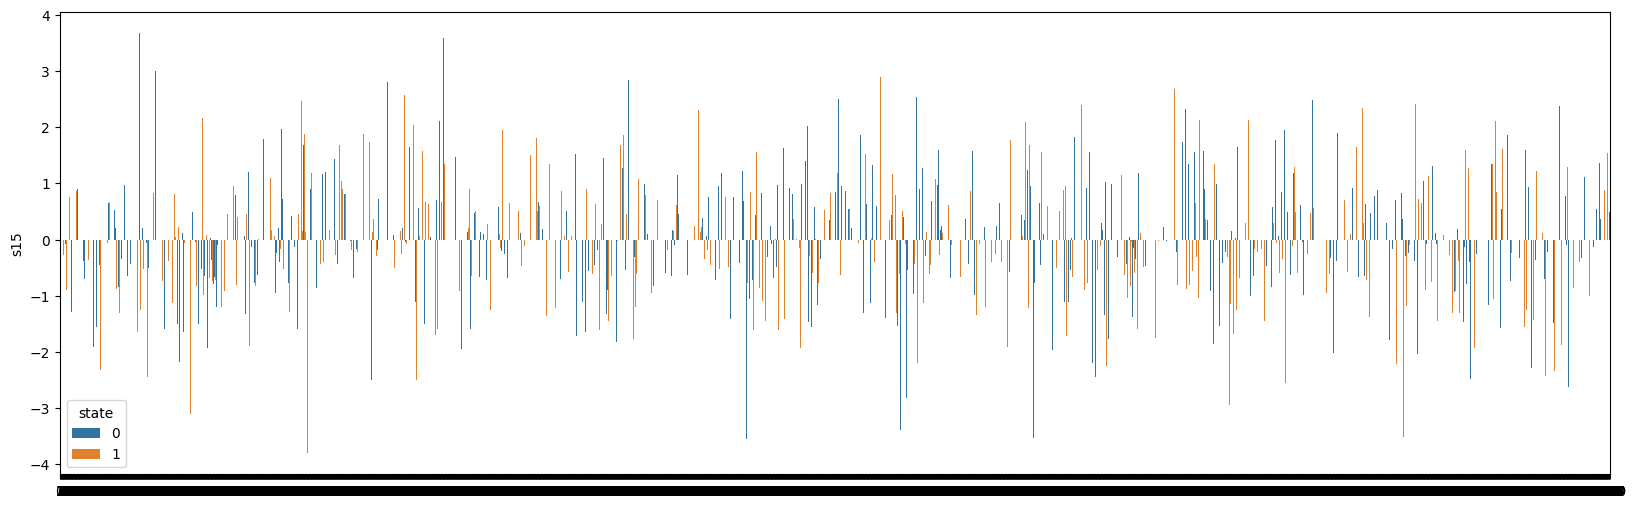

In [32]:
# Feature importance 높은 센서 EDA -> 특징 안보임
plt.figure(figsize=(20, 6))
sns.barplot(data=train_df, x=train_df.index, y='s98', hue='state')
plt.figure(figsize=(20, 6))
sns.barplot(data=train_df, x=train_df.index, y='s38', hue='state')
plt.figure(figsize=(20, 6))
sns.barplot(data=train_df, x=train_df.index, y='s15', hue='state')

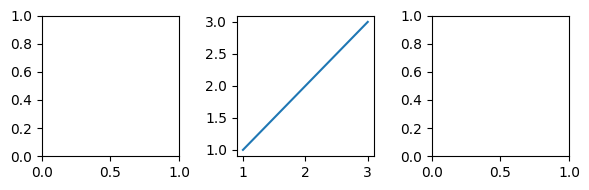

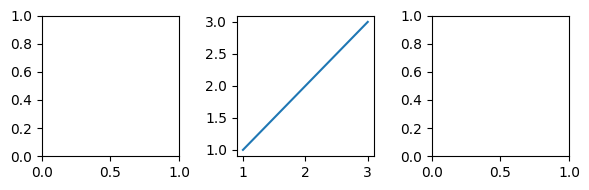

In [33]:
fig, axs = plt.subplots(1,3, figsize=(6,2))
fig2, axs2 = plt.subplots(1,3, figsize=(6,2))

axs[1].plot([1,2,3], [1,2,3])
axs2[1].plot([1,2,3], [1,2,3])

fig.tight_layout()
fig2.tight_layout()
plt.show()

In [34]:
# CNN 반복학습 시키기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv1D, ReLU, GlobalAveragePooling1D, Dense
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model

# 데이터 shape 변환 (for CNN, RNN)
x_train_exp = np.expand_dims(x_train, -1) # x_train 배열의 마지막 차원에 새로운 축을 추가
x_test_exp = np.expand_dims(x_test, -1) # x_train 배열의 마지막 차원에 새로운 축을 추가

# 모델 정의(구조)
def make_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, padding='same')) # 입력과 출력이 같은 길이가 되도록 패딩을 적용
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(Conv1D(filters=64, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(Conv1D(filters=64, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(GlobalAveragePooling1D())
    model.add(Dense(2, activation='softmax'))
    return model

# cnn_model = make_cnn_model() # 모델 초기화 or 
cnn_model = load_model('./cnn_best_model_60+5.h5') # 이미 학습된 모델 불러오기

epochs = 5
# batch_size = 64
callbacks = [
    ModelCheckpoint('./' + 'cnn_best_model_60+10.h5', save_best_only=True, monitor='val_loss'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=0.0001),
    EarlyStopping(monitor='val_loss', patience=50, verbose=1)
]

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['sparse_categorical_accuracy'])

history_cnn = cnn_model.fit(x_train_exp, y_train,
                            # batch_size=batch_size,
                            validation_split=0.2,
                            epochs=epochs, callbacks=callbacks, verbose=1)


Epoch 1/5


2023-07-27 12:32:36.666687: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


90/90 [==============================] - 3s 24ms/step - loss: 0.2557 - sparse_categorical_accuracy: 0.8899 - val_loss: 0.3363 - val_sparse_categorical_accuracy: 0.8613 - lr: 0.0010
Epoch 2/5
90/90 [==============================] - 2s 27ms/step - loss: 0.2381 - sparse_categorical_accuracy: 0.9000 - val_loss: 0.2738 - val_sparse_categorical_accuracy: 0.8710 - lr: 0.0010
Epoch 3/5
90/90 [==============================] - 2s 27ms/step - loss: 0.2269 - sparse_categorical_accuracy: 0.9073 - val_loss: 0.2722 - val_sparse_categorical_accuracy: 0.8904 - lr: 0.0010
Epoch 4/5
90/90 [==============================] - 2s 28ms/step - loss: 0.2406 - sparse_categorical_accuracy: 0.9007 - val_loss: 0.4445 - val_sparse_categorical_accuracy: 0.7656 - lr: 0.0010
Epoch 5/5
90/90 [==============================] - 2s 27ms/step - loss: 0.2561 - sparse_categorical_accuracy: 0.8833 - val_loss: 0.4839 - val_sparse_categorical_accuracy: 0.7809 - lr: 0.0010


In [35]:
print(x_train_exp.shape)
print(x_train.shape)

(3601, 500, 1)
(3601, 500)


In [36]:
test_exp = x_train_exp[0].reshape(1, 500, 1)
cnn_model.predict(test_exp)

1/1 [==============================] - 0s 92ms/step


array([[0.7433471 , 0.25665286]], dtype=float32)

In [37]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 500, 64)           256       
                                                                 
 batch_normalization_3 (Batc  (None, 500, 64)          256       
 hNormalization)                                                 
                                                                 
 re_lu_3 (ReLU)              (None, 500, 64)           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 500, 64)           12352     
                                                                 
 batch_normalization_4 (Batc  (None, 500, 64)          256       
 hNormalization)                                                 
                                                                 
 re_lu_4 (ReLU)              (None, 500, 64)          

In [38]:
cnn_model = tf.keras.models.load_model('./cnn_best_model_60+10.h5')
scores = cnn_model.evaluate(x_test_exp, y_test)

print('test acrr ', scores[1])
print('test loss ', scores[0])

42/42 [==============================] - 0s 5ms/step - loss: 0.2546 - sparse_categorical_accuracy: 0.8909
test acrr  0.8909090757369995
test loss  0.25455623865127563
